In [1]:
!pip install pingouin

In [2]:
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import mannwhitneyu
import pingouin as pg

In [3]:
levelA_df = pd.read_csv("Results_level_A.csv")

In [4]:
levelA_df

,MNB,SVC,RandomForests,DecisionTreeClassifier
0,69,87.25,92.15,86.07
1,69,87.00,90.70,87.64
2,69,87.34,92.35,87.00
3,69,88.00,91.37,87.50
4,69,87.00,90.00,87.00
5,69,87.00,91.17,86.86
6,69,87.25,91.00,86.86
7,69,87.25,91.56,87.05
8,69,87.88,91.56,88.23
9,69,87.56,91.17,87.00


In [5]:
levelA_df.describe()

,MNB,SVC,RandomForests,DecisionTreeClassifier
count,10.0,10.000000,10.000000,10.000000
mean,69.0,87.353000,91.303000,87.121000
std,0.0,0.356684,0.678136,0.570837
min,69.0,87.000000,90.000000,86.070000
25%,69.0,87.062500,91.042500,86.895000
50%,69.0,87.250000,91.270000,87.000000
75%,69.0,87.505000,91.560000,87.387500
max,69.0,88.000000,92.350000,88.230000


<AxesSubplot:>

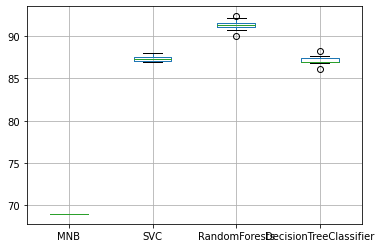

In [6]:
levelA_df.boxplot(column=['MNB','SVC','RandomForests','DecisionTreeClassifier'])

#### The box plot doesnt give any extra information than what we obtained by calculating the mean, it is just a visual representation

# Hypothesis Testing

- Null hypothesis (H0) - There is no difference in the mean precision.
- Alternate hypothesis (H1) - The difference is significant.
- t-test is used for the same, as the classifiers are run on the same dataset, we perform paired t-test.
- p-value is P(D|H0), so smaller the p-value, more confident we are of Null Hypothesis being false.
- If they are below siginificance level like 0.05 or 0.01 then we can reject the null hypothesis.

### T-tests between SVC and RF

In [9]:
stats.ttest_rel(levelA_df.iloc[:,1], levelA_df.iloc[:,2])

Ttest_relResult(statistic=-162.7135346843697, pvalue=6.359952458057432e-17)

### T-Tests between SVC and DTC

In [12]:
stats.ttest_rel(levelA_df.iloc[:,1], levelA_df.iloc[:,3])

Ttest_relResult(statistic=-19.392383609192173, pvalue=1.1916941581975987e-08)

### T-Tests between RF and SVC

In [13]:
stats.ttest_rel(levelA_df.iloc[:,2], levelA_df.iloc[:,1])

Ttest_relResult(statistic=19.392383609192173, pvalue=1.1916941581975987e-08)

### T-Tests between RF and DTC

In [15]:
stats.ttest_rel(levelA_df.iloc[:,2], levelA_df.iloc[:,3])

Ttest_relResult(statistic=13.55096681754482, pvalue=2.7170573863706554e-07)

### T-Tests between DTC and SVC

In [16]:
stats.ttest_rel(levelA_df.iloc[:,3], levelA_df.iloc[:,1])

Ttest_relResult(statistic=-1.4585202605565901, pvalue=0.17869451074869722)

### T-Tests between DTC and RF

In [17]:
stats.ttest_rel(levelA_df.iloc[:,3], levelA_df.iloc[:,2])

Ttest_relResult(statistic=-13.55096681754482, pvalue=2.7170573863706554e-07)

# ANOVA TEST

In [19]:
pg.rm_anova(levelA_df.iloc[:,0:3])

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,Within,2,18,8481.795225,1.689069e-27,0.99894,0.719781


# MANN-Whitney U Tests

In [21]:
# Between MNB and DTC

U1, p = mannwhitneyu(levelA_df.iloc[:,0],levelA_df.iloc[:,3],method="asymptotic")

In [22]:
U1

0.0

In [24]:
p

6.158218645749835e-05

In [25]:
# between SVC and DT

U1, p = mannwhitneyu(levelA_df.iloc[:,1],levelA_df.iloc[:,3],method="asymptotic")

In [27]:
U1

67.5

In [28]:
p

0.19194365082868547

In [29]:
# between RF and SVC

U1, p = mannwhitneyu(levelA_df.iloc[:,2],levelA_df.iloc[:,1],method="asymptotic")

In [30]:
U1

100.0

In [31]:
p

0.00017265399688226732

In [ ]:
# From the above tests we can clearly we